# Hands On PySpark

Notebook provided un the <a href=https://www.coursera.org/projects/data-analysis-using-pyspark>Data Analysis Using Pyspark<a> Guided Project in Coursera.

# Task 1 :

Importing the modules 

In [63]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plt

creating spark session

In [11]:
spark = SparkSession.builder.appName("spark_app").getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [12]:
listening_csv_path = './Data/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(listening_csv_path)

let's check the data:

In [13]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [14]:
listening_df = listening_df.drop('date')

drop the null rows:

In [15]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [16]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema: 

In [17]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [18]:
shape = listening_df.count() , len(listening_df.columns)
print(shape)

(13758905, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [20]:
q0 = listening_df.select('artist', 'track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [24]:
q1 = listening_df.select('*').filter(listening_df.artist == 'Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [29]:
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks 

In [32]:
q3 = listening_df.select('track').groupby('track').agg(count('track').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+-------+-----+
|  track|count|
+-------+-----+
|  Intro|13176|
|   Home| 7576|
|  Hello| 6961|
|Hold On| 5857|
|   Work| 4889|
|  Sorry| 4824|
|   Baby| 4646|
|Runaway| 4429|
| Closer| 4287|
|   Fire| 4141|
+-------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [33]:
q4 = listening_df.select('track').filter(listening_df.artist == 'Rihanna').groupby('track').agg(count('track').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+--------------------+-----+
|               track|count|
+--------------------+-----+
|                Work| 2646|
|Only Girl (In the...| 1749|
|We Found Love (fe...| 1575|
|                 S&M| 1307|
|            Rude Boy| 1303|
|            Diamonds| 1224|
|      Kiss it Better|  945|
| Where Have You Been|  844|
|Cheers (Drink to ...|  697|
|           Desperado|  679|
+--------------------+-----+



**Query #5:**

find top 10 famous albums 

In [34]:
q5 = listening_df.select('album').groupby('album').agg(count('album').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+--------------------+-----+
|               album|count|
+--------------------+-----+
|       Greatest Hits|67892|
|   The Life Of Pablo|22311|
|                  AM|14264|
|                  xx|14198|
|     An Awesome Wave|13673|
|        Sigh No More|13556|
|Whatever People S...|12731|
|            For Emma|11995|
|          Art Angels|11694|
|                  21|11576|
+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [35]:
genre_df_path = './Data/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(genre_df_path)

let's check the data

In [40]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

In [51]:
inner = listening_df.join(genre_df, how='inner', on=listening_df.artist == genre_df.artist)

**Query #6**

find top 10 users who are fan of ***pop*** music

In [52]:
q6 = inner.select('user_id').filter(inner.genre == 'pop').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [53]:
q7 = genre_df.select('genre').groupby('genre').agg(count('genre').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-----+
|     genre|count|
+----------+-----+
|      rock| 9066|
|       pop| 6960|
|electronic| 4410|
|      jazz| 4400|
|   hip hop| 4288|
|     house| 3310|
|      folk| 3217|
|     dance| 2894|
|      punk| 2661|
|soundtrack| 2360|
+----------+-----+



# Task 5:
**Query #8**

find out each user favourite genre

In [59]:
q8_1 = inner.select('user_id', 'genre').groupby('user_id','genre').agg(count('user_id').alias('count')).orderBy(desc('count'))
q8_1.show()

+--------------+--------------------+-----+
|       user_id|               genre|count|
+--------------+--------------------+-----+
|     mrsands91|                 r&b|  952|
|     Benjiibop|                 r&b|  950|
|     sbrooks91|                 r&b|  915|
|       Pete557|                 r&b|  836|
|      _Seichi_|                 r&b|  765|
|     b00g13man| Associated Perfo...|  745|
|       Kaigamo|                 r&b|  741|
|   Kojobimpong|                jazz|  722|
| dejectedxcore|            synthpop|  665|
|   pussycatboi|                 r&b|  664|
|       Munross| Associated Perfo...|  645|
|     chazrules|                 r&b|  641|
|     LizzieJoe|                jazz|  640|
|lennyautomatik| Associated Perfo...|  625|
|   NaomiWaters|                 r&b|  620|
|   elizawright|                 r&b|  605|
|        jhnhtt| Associated Perfo...|  600|
|         oleuk|    Stephen Merchant|  600|
|    dragula100|                rock|  599|
|  WarrenPearce|                

In [66]:
q8_2 = q8_1.groupby('user_id').agg(max(struct(col('count'), col('genre'))).alias('max')).orderBy(desc('user_id'))
q8_2.show()

+--------------+--------------------+
|       user_id|                 max|
+--------------+--------------------+
|     mrsands91|          [952, r&b]|
|     Benjiibop|          [950, r&b]|
|     sbrooks91|          [915, r&b]|
|       Pete557|          [836, r&b]|
|      _Seichi_|          [765, r&b]|
|     b00g13man|[745,  Associated...|
|       Kaigamo|          [741, r&b]|
|   Kojobimpong|         [722, jazz]|
| dejectedxcore|     [665, synthpop]|
|   pussycatboi|          [664, r&b]|
|       Munross|[645,  Associated...|
|     chazrules|          [641, r&b]|
|     LizzieJoe|         [640, jazz]|
|lennyautomatik|[625,  Associated...|
|   NaomiWaters|          [620, r&b]|
|   elizawright|          [605, r&b]|
|         oleuk|[600,  Stephen Me...|
|        jhnhtt|[600,  Associated...|
|    dragula100|         [599, rock]|
|  WarrenPearce|          [588, r&b]|
+--------------+--------------------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have and then visulize it using bar chart 

In [69]:
genres = ['pop', 'rock', 'metal', 'hip hop']

In [70]:
q9 = inner.select('genre').filter(inner.genre.isin(genres)).groupby('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-------+
|  genre|  count|
+-------+-------+
|    pop|1544747|
|hip hop| 532984|
|  metal| 208107|
|   rock|2691934|
+-------+-------+



Now, let's visualize the results using ***matplotlib***

In [74]:
q9_list = q9.collect()

In [76]:
labels = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

now lets visualize these two lists using a bar chart

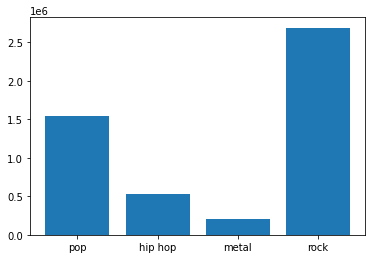

In [78]:
plt.bar(labels, counts)
plt.show()